# Python Data Analysis – Step-by-Step Exercises


This notebook covers setup, cleaning, EDA, joins, reshaping, window functions, time series,
outliers, basic plotting, and a simple model. Each task has an **Exercise** and a **Solution**.


In [4]:
# Data in Google Sheets
gs1 = 'https://docs.google.com/spreadsheets/d/'
sheetid = '19ReQlRfDQHcV1OFUnmVkiFY_1IrJeOR0g1RmrjfjMD4'
gs2 = '/export?format=csv&gid='
gidO = '764977169' #orders
gidR = '675685971' #Returns
gidP = '1527535056' #People
gsurlO = gs1 + sheetid + gs2 + gidO
gsurlR = gs1 + sheetid + gs2 + gidR
gsurlP = gs1 + sheetid + gs2 + gidP

print(gsurlO, gsurlR, gsurlP, end ='\n', sep ='\n')


https://docs.google.com/spreadsheets/d/19ReQlRfDQHcV1OFUnmVkiFY_1IrJeOR0g1RmrjfjMD4/export?format=csv&gid=764977169
https://docs.google.com/spreadsheets/d/19ReQlRfDQHcV1OFUnmVkiFY_1IrJeOR0g1RmrjfjMD4/export?format=csv&gid=675685971
https://docs.google.com/spreadsheets/d/19ReQlRfDQHcV1OFUnmVkiFY_1IrJeOR0g1RmrjfjMD4/export?format=csv&gid=1527535056


In [6]:
#load multiple libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [ ]:
#Load Data
orders = pd.read_csv(gsurlO, parse_dates=["Order Date","Ship Date"])
returns = pd.read_csv(gsurlR)
people  = pd.read_csv(gsurlP)

In [14]:
# Check for rows and column counts
print('Orders Table - ', orders.shape, '\nReturn Table - ',  returns.shape, '\nPeople Table - ', people.shape)

Orders Table -  (9994, 21) 
Return Table -  (296, 2) 
People Table -  (4, 2)


### Inspect & Clean

In [15]:
orders.info(); orders.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1237,1334,4,793,793,3,1,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,5/9/2016,16/12/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,38,35,5968,37,37,5191,9994,915,...,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32063.693350,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [16]:
orders.isna().sum(), orders.duplicated().sum()

(Row ID           0
 Order ID         0
 Order Date       0
 Ship Date        0
 Ship Mode        0
 Customer ID      0
 Customer Name    0
 Segment          0
 Country          0
 City             0
 State            0
 Postal Code      0
 Region           0
 Product ID       0
 Category         0
 Sub-Category     0
 Product Name     0
 Sales            0
 Quantity         0
 Discount         0
 Profit           0
 dtype: int64,
 0)

In [17]:
orders = orders.drop_duplicates()
orders["Profit"] = orders["Profit"].fillna(orders["Profit"].median())
orders["Region"] = orders["Region"].fillna("Unknown")
orders.isna().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Filtering, Sorting, Strings

In [18]:
high_value_sorted = orders[(orders["Sales"]>500)&(orders["Discount"]<0.3)].sort_values("Sales", ascending=False).head(5); high_value_sorted

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6826,6827,CA-2016-118689,2/10/2016,9/10/2016,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8153,8154,CA-2017-140151,23/3/2017,25/3/2017,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808
2623,2624,CA-2017-127180,22/10/2017,24/10/2017,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
4190,4191,CA-2017-166709,17/11/2017,22/11/2017,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856
9039,9040,CA-2016-117121,17/12/2016,21/12/2016,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Detroit,...,48205,Central,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,13,0.0,4946.3700


In [19]:
orders["Product ID"].astype(str).str.startswith("P-1").sum()

0

### Feature Engineering

### GroupBy & Pivot

In [22]:
g = orders.groupby(["Region","Category"]).agg(Sales_sum=("Sales","sum"), Discount_avg=("Discount","mean"), Profit_mean=("Profit","mean"), Orders=("Order ID","count")).reset_index()
g.head()


,Region,Category,Sales_sum,Discount_avg,Profit_mean,Orders
0,Central,Furniture,163797.1638,0.297380,-5.968918,481
1,Central,Office Supplies,167026.4150,0.252743,6.244712,1422
2,Central,Technology,170416.3120,0.133095,80.231981,420
3,East,Furniture,208291.2040,0.154077,5.068496,601
4,East,Office Supplies,205516.0550,0.142932,23.957114,1712


### Joins & Reshaping

In [24]:
ord_ret = orders.merge(returns, on="Order ID", how="left").assign(Returned=lambda d: d["Returned"].fillna("No"))
return_rate = (ord_ret["Returned"]=="Yes").mean(); return_rate


0.08004802881729037

### Window Functions

In [27]:

orders_sorted = orders.sort_values("Order Date").copy()
orders_sorted["CumSalesRegion"] = orders_sorted.groupby("Region")["Sales"].cumsum()
orders_sorted["Roll3SalesCust"] = (orders_sorted.groupby("Customer ID")["Sales"].rolling(3, min_periods=1).mean().reset_index(level=0, drop=True))
orders_sorted["CatRank"] = orders_sorted.groupby("Category")["Sales"].rank(method="min", ascending=False).astype(int)
orders_sorted[["Region","Customer ID","Sales","CumSalesRegion","Roll3SalesCust","Category","CatRank"]].head()


,Region,Customer ID,Sales,CumSalesRegion,Roll3SalesCust,Category,CatRank
848,East,GA-14725,48.896,48.896,48.896000,Furniture,1574
8073,Central,JM-15250,6.470,6.470,6.470000,Office Supplies,5327
8072,Central,JM-15250,12.736,19.206,9.603000,Office Supplies,4406
8071,Central,JM-15250,310.744,329.950,109.983333,Furniture,726
8070,Central,JM-15250,141.420,471.370,154.966667,Furniture,1174


### Time Series

### Outliers

In [29]:

q1,q3 = orders["Profit"].quantile([0.25,0.75]); iqr = q3-q1; low,high = q1-1.5*iqr, q3+1.5*iqr
outliers = orders[(orders["Profit"]<low)|(orders["Profit"]>high)]; (len(outliers), outliers["Profit"].describe())


(1881,
 count    1881.000000
 mean      102.207906
 std       532.477102
 min     -6599.978000
 25%       -58.305600
 50%        93.698800
 75%       178.800000
 max      8399.976000
 Name: Profit, dtype: float64)

### Visualization

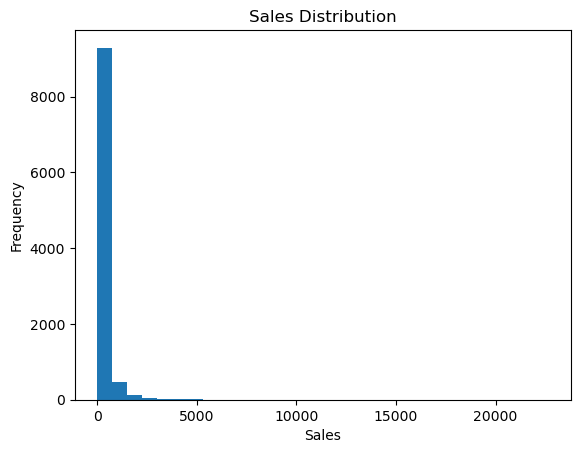

In [30]:

plt.figure(); orders["Sales"].plot(kind="hist", bins=30); plt.title("Sales Distribution"); plt.xlabel("Sales"); plt.ylabel("Frequency"); plt.show()


<Figure size 640x480 with 0 Axes>

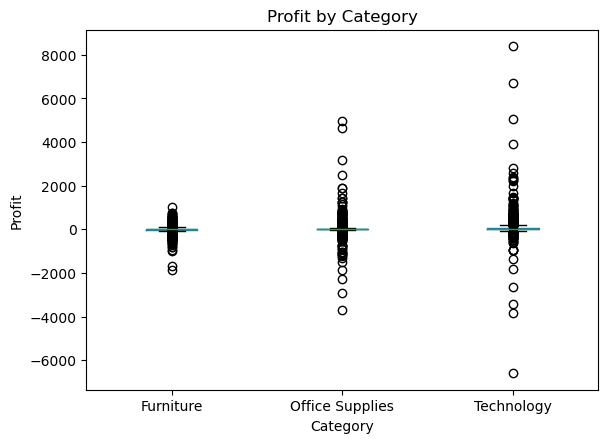

In [31]:

plt.figure(); orders.boxplot(column="Profit", by="Category", grid=False); plt.title("Profit by Category"); plt.suptitle(""); plt.xlabel("Category"); plt.ylabel("Profit"); plt.show()


### Simple Modeling

In [32]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

df = orders[["Sales","Quantity","Discount","Category"]].dropna().copy()
X = pd.get_dummies(df[["Quantity","Discount","Category"]], drop_first=True); y = df["Sales"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = LinearRegression().fit(X_train,y_train); pred = model.predict(X_test)
mae = mean_absolute_error(y_test,pred); r2 = r2_score(y_test,pred); (mae,r2)


(249.09385544293224, 0.08022345271038644)

### Save Results